In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (50000, 32, 32, 3)


In [7]:
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]      # Number of training images
Nte = x_test.shape[0]       # Number of test images
Din = 3072 # CIFAR10        # 3x32x32 (32x32 colour image)
# Din = 784 # MINIST
# Normalize pixel values
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Create weight and bias arrays
H=200       # Number of hidden nodes
std=1e-5
w1 = (2/(Ntr*Din))**0.5*np.random.randn(Din, H)  #get std value from (2/(Ntr*Din))**0.5 
w2 = (2/(Ntr*H))**0.5*np.random.randn(H, K)      #get std value from (2/(Ntr*H))**0.5
b1 = np.zeros(H)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
batch_size = 500


w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)


In [8]:
iterations =  300
lr = 1.3e-4         #learning rate
lr_decay=0.999      #learning rate decay
reg = 5e-6
train_loss_history = []     #loss of training set at each iteration 
test_loss_history = []      #loss of test set at each iteration 
train_acc_history = []      #accuracy of training set at each iteration 
val_acc_history = []        #accuracy of test set at each iteration
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    indices = np.random.choice(Ntr, batch_size, replace=False)
    rng.shuffle(indices)
    x_t = x_train[indices]
    y_t = y_train[indices]
    
    # Forward pass
    h=1.0/(1.0 +np.exp(-(x_t.dot(w1) + b1)))
    h_test=1.0/(1.0 +np.exp(-(x_test.dot(w1) + b1)))
    y_pred_t = h.dot(w2) + b2
    y_pred_v = h_test.dot(w2) + b2
    # Calculate loss and put values to corresponding list
    train_loss = 1./batch_size*np.square(y_pred_t-y_t).sum() + reg* (np.sum(w2*w2)+np.sum(w1*w1))
    train_loss_history.append(train_loss)
    
    test_loss = 1./Nte*np.square(y_pred_v-y_test).sum() + reg* (np.sum(w2*w2)+np.sum(w1*w1))
    test_loss_history.append(test_loss)
    #Calculate accuracy and put values to corresponding list
    train_acc= (1/Ntr)*(np.abs(np.argmax(y_t, axis=1)==np.argmax(y_pred_t, axis=1))).sum()
    train_acc_history.append(train_acc)

    val_acc=(1/Nte)*(np.abs(np.argmax(y_test, axis=1)==np.argmax(y_pred_v, axis=1))).sum()
    val_acc_history.append(val_acc)

    if t%10==0:
        print('Epochs %d / %d , learning rate: %f , train loss %f , test loss %f , train accuracy %f , test accuracy %f' % (t, iterations, lr, train_loss, test_loss, train_acc, val_acc))
    # Backward pass
    dy_pred=1./batch_size*2.0*(y_pred_t-y_t)
    dw2=h.T.dot(dy_pred)+reg*w2
    db2=dy_pred.sum(axis=0)
    dh=dy_pred.dot(w2.T)
    dw1=x_t.T.dot(dh*h*(1-h)) + reg*w1
    db1=(dh*h*(1-h)).sum(axis=0)

    w1 -= lr*dw1
    w2 -= lr*dw2
    b1 -= lr*db1
    b2 -= lr*db2
    lr *= lr_decay

Epochs 0 / 300 , learning rate: 0.000130 , train loss 0.998764 , test loss 0.999212 , train accuracy 0.001400 , test accuracy 0.104400
Epochs 10 / 300 , learning rate: 0.000129 , train loss 0.974784 , test loss 0.974978 , train accuracy 0.001500 , test accuracy 0.115100
Epochs 20 / 300 , learning rate: 0.000127 , train loss 0.956281 , test loss 0.956332 , train accuracy 0.001460 , test accuracy 0.139400
Epochs 30 / 300 , learning rate: 0.000126 , train loss 0.942132 , test loss 0.941908 , train accuracy 0.001300 , test accuracy 0.164100
Epochs 40 / 300 , learning rate: 0.000125 , train loss 0.930437 , test loss 0.930693 , train accuracy 0.002120 , test accuracy 0.194600
Epochs 50 / 300 , learning rate: 0.000124 , train loss 0.921906 , test loss 0.921840 , train accuracy 0.002060 , test accuracy 0.211200
Epochs 60 / 300 , learning rate: 0.000122 , train loss 0.914932 , test loss 0.914772 , train accuracy 0.002360 , test accuracy 0.229700
Epochs 70 / 300 , learning rate: 0.000121 , train

Text(0, 0.5, 'Accuracy')

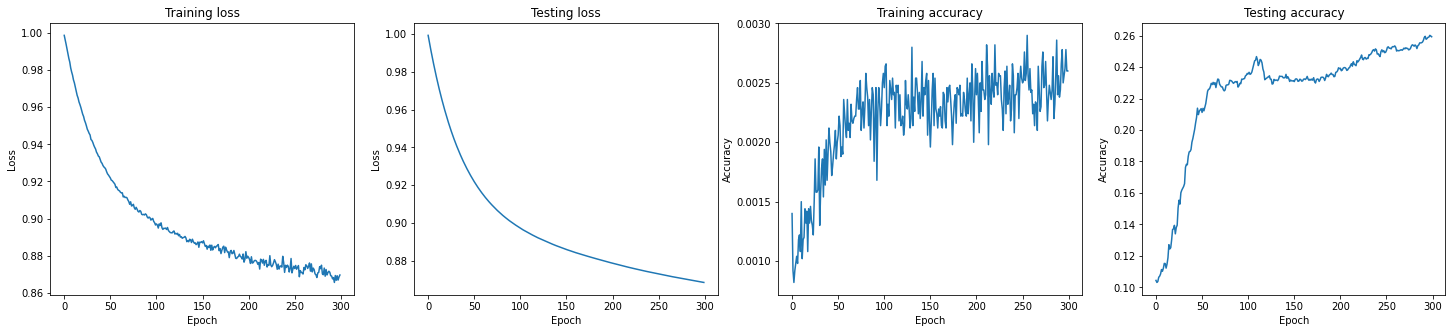

In [10]:
# Plotting losses and accuracies 
fig , ax = plt.subplots(figsize=(25,5 ))
plt.subplot(1,4,1)
plt.plot(train_loss_history)
plt.title("Training loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,4,2)
plt.plot(test_loss_history)
plt.title("Testing loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,4,3)
plt.plot(train_acc_history)
plt.title("Training accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,4,4)
plt.plot(val_acc_history)
plt.title("Testing accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')



